# 1.Encodage et normalisation des données

## 1.1

In [1]:
import pandas as pd
df=pd.read_csv(r'C:\Users\Admin\Desktop\School\S5\Data Modeling\final_data.csv')

In [14]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [15]:
a=df['sex'].value_counts()
a

sex
male      843
female    464
Name: count, dtype: int64

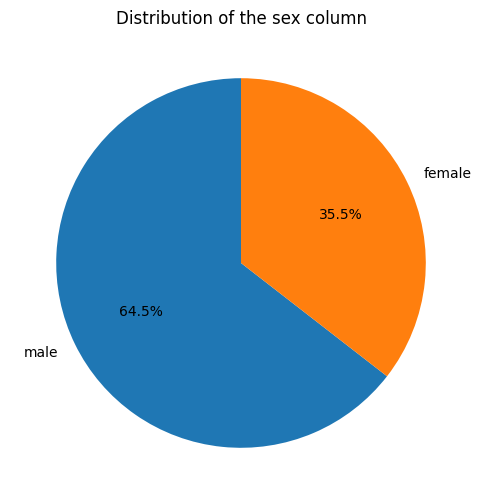

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.pie(a, labels=a.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of the sex column')
plt.show()

In [17]:
df['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [18]:
b=df['embarked'].value_counts()
b

embarked
S    914
C    270
Q    123
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

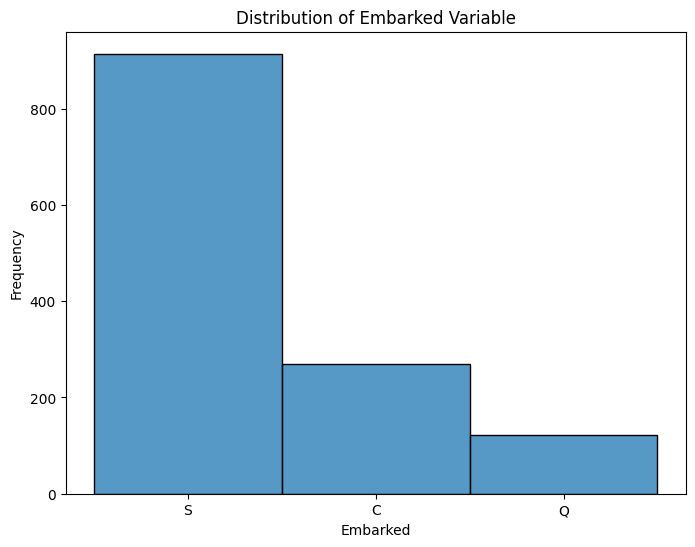

In [19]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.histplot(df['embarked'], discrete=True, kde=False)
plt.title('Distribution of Embarked Variable')
plt.xlabel('Embarked')
plt.ylabel('Frequency')

## 1.2

In [2]:
from sklearn.preprocessing import OneHotEncoder

embarked = df[['embarked']]
encoder = OneHotEncoder(sparse_output=False)
encoded_embarked = encoder.fit_transform(embarked)
encoded_columns = encoder.get_feature_names_out(['embarked'])
encoded_df = pd.DataFrame(encoded_embarked, columns=encoded_columns)
df = pd.concat([df, encoded_df], axis=1)

df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,homedest,embarked_C,embarked_Q,embarked_S
0,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S,3,135.0,"New York, NY",0.0,0.0,1.0
1,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,D,135.0,"Belfast, NI",0.0,0.0,1.0
2,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,135.0,"Bayside, Queens, NY",0.0,0.0,1.0
3,1,0,"Baumann, Mr. John D",male,28.0,0,0,PC 17318,25.9250,B58 B60,S,5,124.0,"New York, NY",0.0,0.0,1.0
4,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,5,124.0,"New York, NY",1.0,0.0,0.0


In [3]:
df_dummies = pd.get_dummies(df, columns=['sex'], drop_first=True)
df_dummies

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,homedest,embarked_C,embarked_Q,embarked_S,sex_male
0,1,1,"Anderson, Mr. Harry",48.0,0,0,19952,26.5500,E12,S,3,135.0,"New York, NY",0.0,0.0,1.0,True
1,1,0,"Andrews, Mr. Thomas Jr",39.0,0,0,112050,0.0000,A36,S,D,135.0,"Belfast, NI",0.0,0.0,1.0,True
2,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",53.0,2,0,11769,51.4792,C101,S,D,135.0,"Bayside, Queens, NY",0.0,0.0,1.0,False
3,1,0,"Baumann, Mr. John D",28.0,0,0,PC 17318,25.9250,B58 B60,S,5,124.0,"New York, NY",0.0,0.0,1.0,True
4,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,5,124.0,"New York, NY",1.0,0.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,3,0,"Zabour, Miss. Hileni",14.5,1,0,2665,14.4542,NaN,C,C,328.0,"Antwerp, Belgium / Stanton, OH",1.0,0.0,0.0,False
828,3,0,"Zabour, Miss. Thamine",28.0,1,0,2665,14.4542,NaN,C,C,328.0,"Antwerp, Belgium / Stanton, OH",1.0,0.0,0.0,False
829,3,0,"Zakarian, Mr. Mapriededer",26.5,0,0,2656,7.2250,NaN,C,C,304.0,"Antwerp, Belgium / Stanton, OH",1.0,0.0,0.0,True
830,3,0,"Zakarian, Mr. Ortin",27.0,0,0,2670,7.2250,NaN,C,C,304.0,"Antwerp, Belgium / Stanton, OH",1.0,0.0,0.0,True


### Encodage avec d'autres techniques

In [22]:
#Label encoder
from sklearn.preprocessing import LabelEncoder

df_label_encoded = df.copy()

label_encoder_embarked = LabelEncoder()
df_label_encoded['embarked'] = label_encoder_embarked.fit_transform(df_label_encoded['embarked'])

label_encoder_sex = LabelEncoder()
df_label_encoded['sex'] = label_encoder_sex.fit_transform(df_label_encoded['sex'])

df_label_encoded.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,homedest,embarked_C,embarked_Q,embarked_S
0,1,1,"Anderson, Mr. Harry",1,48.0,0,0,19952,26.5500,E12,2,3,135.0,"New York, NY",0.0,0.0,1.0
1,1,0,"Andrews, Mr. Thomas Jr",1,39.0,0,0,112050,0.0000,A36,2,D,135.0,"Belfast, NI",0.0,0.0,1.0
2,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",0,53.0,2,0,11769,51.4792,C101,2,D,135.0,"Bayside, Queens, NY",0.0,0.0,1.0
3,1,0,"Baumann, Mr. John D",1,28.0,0,0,PC 17318,25.9250,B58 B60,2,5,124.0,"New York, NY",0.0,0.0,1.0
4,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0,5,124.0,"New York, NY",1.0,0.0,0.0


In [24]:
# Target encoding
import category_encoders as ce

df_target_encoded = df.copy()
target_encoder = ce.TargetEncoder(cols=['embarked', 'sex'])
df_target_encoded = target_encoder.fit_transform(df_target_encoded, df_target_encoded['survived'])
df_target_encoded.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,homedest,embarked_C,embarked_Q,embarked_S
0,1,1,"Anderson, Mr. Harry",0.154839,48.0,0,0,19952,26.5500,E12,0.247508,3,135.0,"New York, NY",0.0,0.0,1.0
1,1,0,"Andrews, Mr. Thomas Jr",0.154839,39.0,0,0,112050,0.0000,A36,0.247508,D,135.0,"Belfast, NI",0.0,0.0,1.0
2,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",0.660377,53.0,2,0,11769,51.4792,C101,0.247508,D,135.0,"Bayside, Queens, NY",0.0,0.0,1.0
3,1,0,"Baumann, Mr. John D",0.154839,28.0,0,0,PC 17318,25.9250,B58 B60,0.247508,5,124.0,"New York, NY",0.0,0.0,1.0
4,1,1,"Behr, Mr. Karl Howell",0.154839,26.0,0,0,111369,30.0000,C148,0.362901,5,124.0,"New York, NY",1.0,0.0,0.0


One-Hot Encoding transforme chaque catégorie en une colonne binaire distincte, ce qui peut augmenter la dimensionnalité du dataset mais permet une représentation sans ordre implicite entre les catégories. 
Label Encoding, en revanche, attribue un entier unique à chaque catégorie, ce qui peut introduire un ordre non voulu entre les catégories. 
Enfin, Target Encoding remplace chaque catégorie par une moyenne basée sur la variable cible, ce qui peut être utile dans les modèles supervisés, mais comporte des risques de sur-apprentissage si mal utilisé.

# 2.Normalisation

# 2.1 Normalisation avec Standard Scaler

In [25]:
from sklearn.preprocessing import StandardScaler
from scipy import stats
import numpy as np

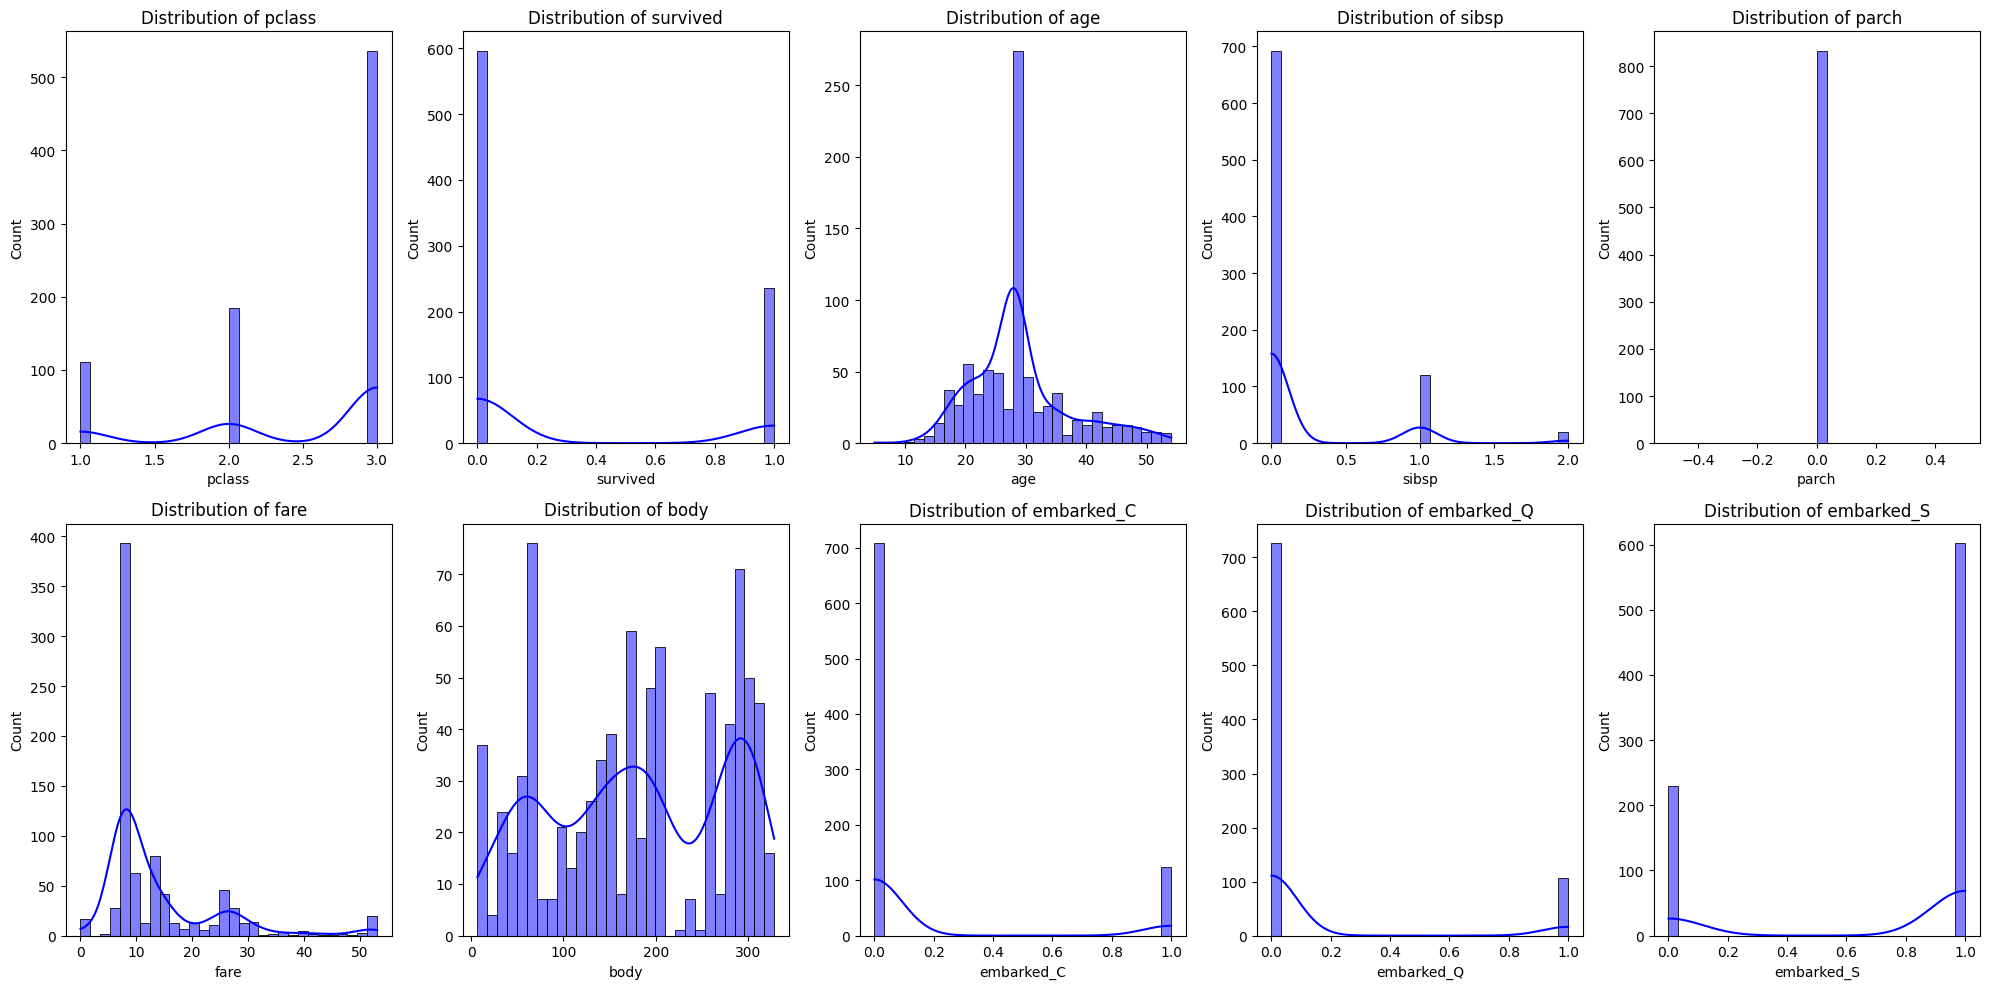

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
fig, axes = plt.subplots(2, 5, figsize=(20, 10))  
for i, col in enumerate(numeric_cols[:10]): 
    row = i // 5  
    col_idx = i % 5  
    # Tracer un histogramme avec une courbe KDE sur le sous-graphe approprié
    sns.histplot(df[col], kde=True, bins=30, color='blue', ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [26]:
# Identifier les variables suivant une loi normale
normal_vars = []
for col in numeric_cols:
    stat, p_value = stats.shapiro(df[col])
    if p_value > 0.05:  
        normal_vars.append(col)

print("Variables suivant une loi normale:", normal_vars)

Variables suivant une loi normale: ['parch']


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Appliquer la standardisation sur la variable 'age'
df['age_standardized'] = scaler.fit_transform(df[['age']])
df[['age', 'age_standardized']].head()

,age,age_standardized
0,48.0,2.327994
1,39.0,1.229395
2,53.0,2.938327
3,28.0,-0.113337
4,26.0,-0.357470


# 2.2. Normalisation avec minmax

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df[numeric_cols]
df_normalized = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

print("DataFrame normalisé :")
df_normalized.head()

DataFrame normalisé :


,pclass,survived,age,sibsp,parch,fare,body,embarked_C,embarked_Q,embarked_S,age_standardized
0,0.0,1.0,0.877551,0.0,0.0,0.500000,0.398754,0.0,0.0,1.0,0.877551
1,0.0,0.0,0.693878,0.0,0.0,0.000000,0.398754,0.0,0.0,1.0,0.693878
2,0.0,1.0,0.979592,1.0,0.0,0.969476,0.398754,0.0,0.0,1.0,0.979592
3,0.0,0.0,0.469388,0.0,0.0,0.488230,0.364486,0.0,0.0,1.0,0.469388
4,0.0,1.0,0.428571,0.0,0.0,0.564972,0.364486,1.0,0.0,0.0,0.428571


# 2.Transformation paramétriques

## 2.1 Transformation logarithmique

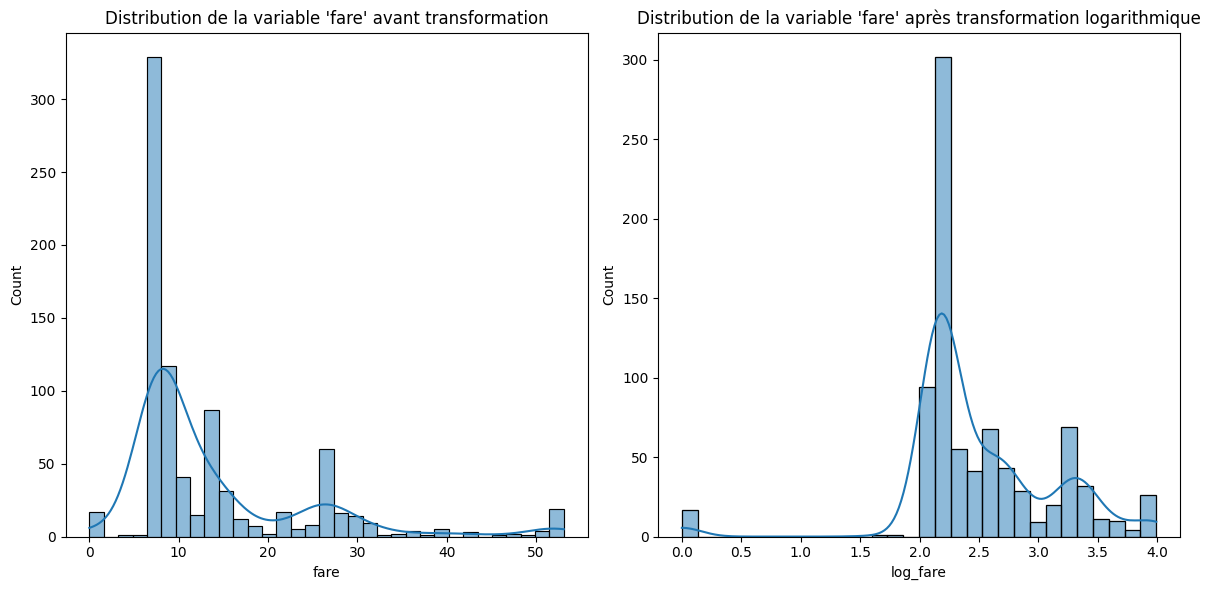

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Application de la transformation logarithmique
df['log_fare'] = np.log(df['fare'] + 1)  # +1 pour éviter les log(0)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['fare'], kde=True)
plt.title("Distribution de la variable 'fare' avant transformation")

plt.subplot(1, 2, 2)
sns.histplot(df['log_fare'], kde=True)
plt.title("Distribution de la variable 'fare' après transformation logarithmique")

plt.tight_layout()
plt.show()

In [14]:
# Vérification avec des statistiques descriptives
print("Statistiques descriptives avant transformation :")
print(df['fare'].describe())

print("\nStatistiques descriptives après transformation logarithmique :")
print(df['log_fare'].describe())

Statistiques descriptives avant transformation :
count    1307.000000
mean       33.224011
std        51.746164
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

Statistiques descriptives après transformation logarithmique :
count    1307.000000
mean        2.977670
std         0.967576
min         0.000000
25%         2.185579
50%         2.737881
75%         3.474293
max         6.240917
Name: log_fare, dtype: float64


## 2.2 Transformation Box cox

La transformation de Box-Cox nécessite des données strictement positives, mais si on a des valeurs négatives, plusieurs solutions sont possibles. L'une des approches consiste à ajouter une constante positive à toutes les valeurs pour les rendre positives, ce qui permet d'appliquer Box-Cox. Une alternative plus adaptée est la transformation de Yeo-Johnson, qui gère les données négatives et nulles sans nécessiter de modification des valeurs. Cette méthode est souvent préférée pour son adaptabilité et sa simplicité dans le traitement des données contenant des valeurs négatives.

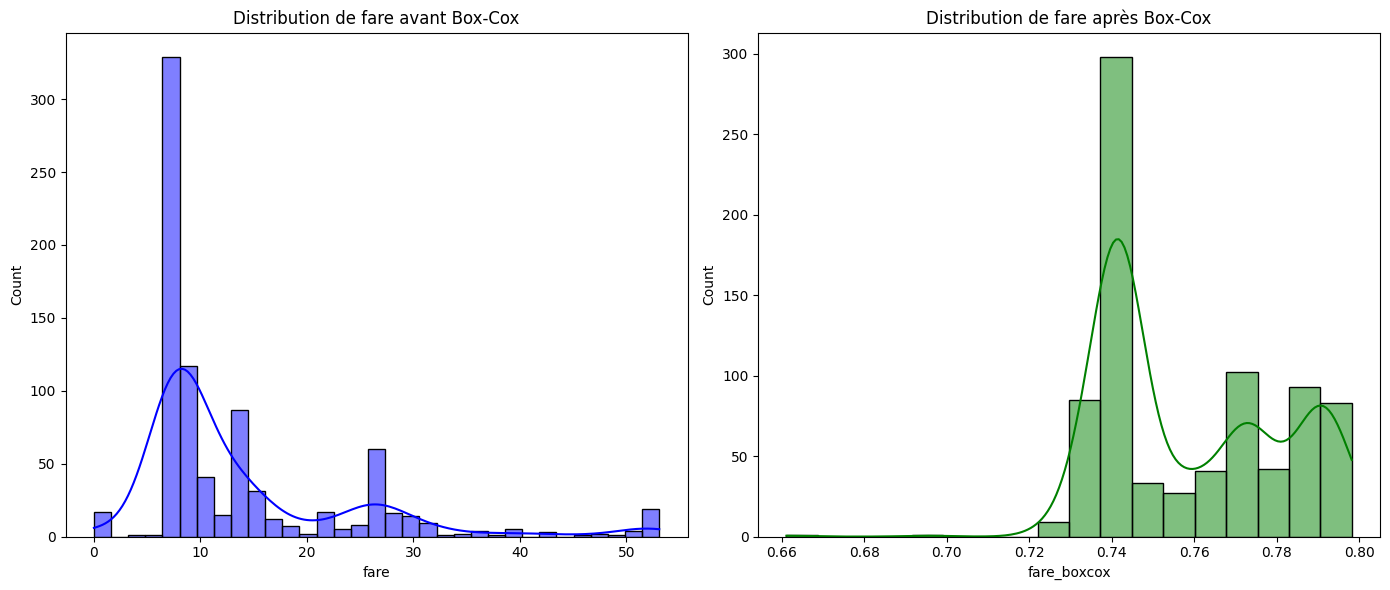

In [35]:
from scipy import stats

# On vérifie que toutes les valeurs de 'fare' sont positives
fare_positive = df['fare'][df['fare'] > 0]

fare_boxcox, lmbda = stats.boxcox(fare_positive)

# Ajouter la variable transformée au DataFrame
df['fare_boxcox'] = pd.Series(fare_boxcox, index=fare_positive.index)

# Visualisation avant et après la transformation
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
sns.histplot(df['fare'], kde=True, color='blue')
plt.title('Distribution de fare avant Box-Cox')
plt.subplot(1, 2, 2)
sns.histplot(df['fare_boxcox'], kde=True, color='green')
plt.title('Distribution de fare après Box-Cox')

plt.tight_layout()
plt.show()


## 2.3 Transformation de Yeo-Johnson

In [33]:
from scipy import stats
from sklearn.preprocessing import PowerTransformer

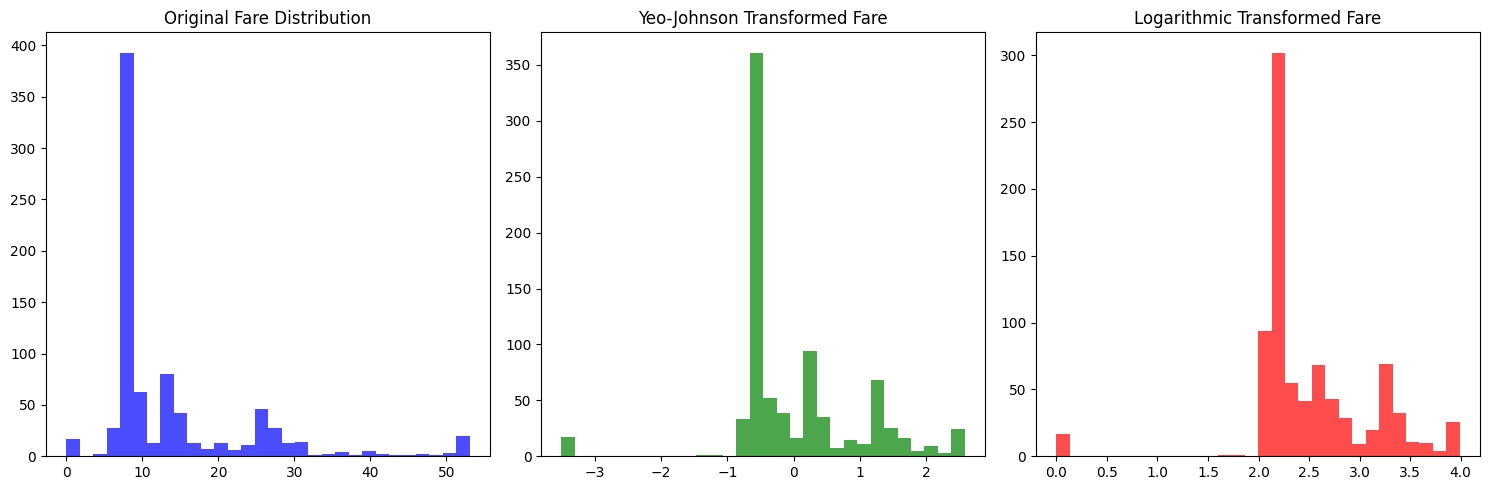

In [37]:
# Transformation de Yeo-Johnson 
yeo_transformer = PowerTransformer(method='yeo-johnson')
df['yeo_fare'] = yeo_transformer.fit_transform(df[['fare']])

plt.figure(figsize=(15, 5))

# Distribution originale
plt.subplot(1, 3, 1)
plt.hist(df['fare'], bins=30, color='blue', alpha=0.7)
plt.title('Original Fare Distribution')

# Distribution après transformation Yeo-Johnson
plt.subplot(1, 3, 2)
plt.hist(df['yeo_fare'], bins=30, color='green', alpha=0.7)
plt.title('Yeo-Johnson Transformed Fare')

# Distribution après transformation logarithmique
plt.subplot(1, 3, 3)
plt.hist(df['log_fare'], bins=30, color='red', alpha=0.7)
plt.title('Logarithmic Transformed Fare')

plt.tight_layout()
plt.show()

In [39]:
# Comparaison des statistiques
print("Statistiques après transformation :")
print("Original Fare: ", df['fare'].describe())
print("Yeo-Johnson Fare: ", df['yeo_fare'].describe())
print("Logarithmic Fare: ", df['log_fare'].describe())
print("Box-Cox Fare: ", df['fare_boxcox'].describe())

Statistiques après transformation :
Original Fare:  count    832.000000
mean      13.828785
std       10.370550
min        0.000000
25%        7.775000
50%        8.658350
75%       15.500000
max       53.100000
Name: fare, dtype: float64
Yeo-Johnson Fare:  count    8.320000e+02
mean     1.366428e-16
std      1.000602e+00
min     -3.504098e+00
25%     -5.618314e-01
50%     -4.129571e-01
75%      4.512205e-01
max      2.582339e+00
Name: yeo_fare, dtype: float64
Logarithmic Fare:  count    832.000000
mean       2.504212
std        0.628563
min        0.000000
25%        2.171907
50%        2.267823
75%        2.803360
max        3.990834
Name: log_fare, dtype: float64
Box-Cox Fare:  count    815.000000
mean       0.758882
std        0.021764
min        0.661136
25%        0.741194
50%        0.749081
75%        0.777309
max        0.798140
Name: fare_boxcox, dtype: float64


# 3. Discrétisation des variables continues et Réduction de la cardinalité des variables catégorielles

## 3.1 Création de nouvelles variables

In [31]:
df['family_size'] = df['sibsp'] + df['parch'] + 1  # +1 pour inclure le passager lui-même

df['is_alone'] = df['family_size'].apply(lambda x: 1 if x == 1 else 0)

df['age_category'] = pd.cut(df['age'], bins=[0, 12, 18, 60, 100], labels=['Child', 'Teenager', 'Adult', 'Senior'])

# Affichage des premières lignes pour vérifier les nouvelles variables
print(df[['family_size', 'is_alone', 'age_category']].head())

   family_size  is_alone age_category
0            1         1        Adult
1            1         1        Adult
2            3         0        Adult
3            1         1        Adult
4            1         1        Adult


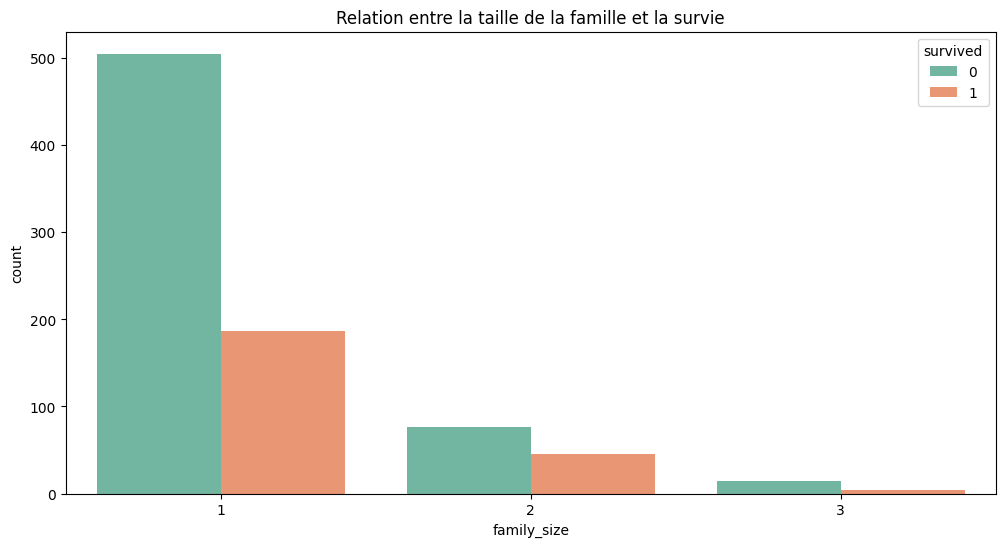

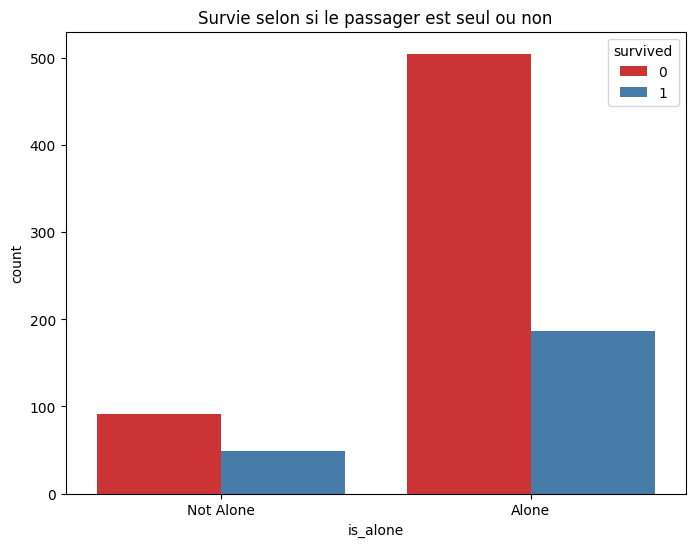

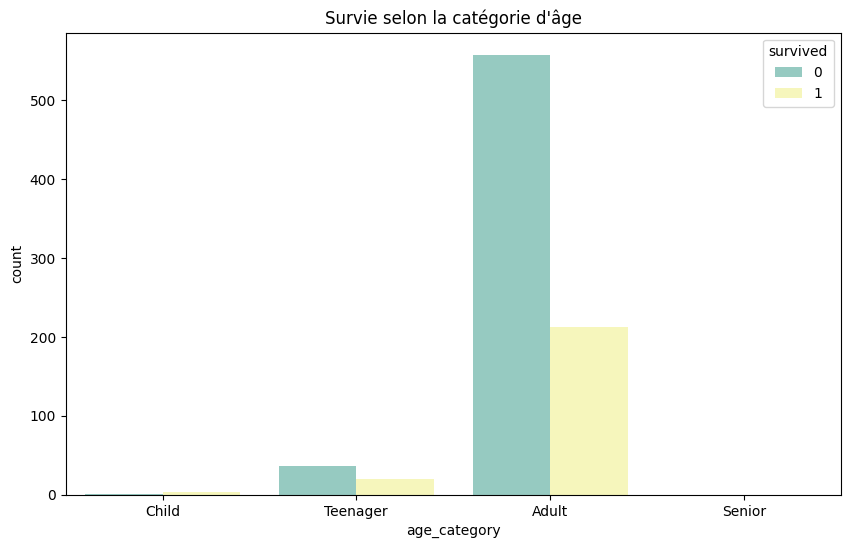

In [38]:
# Relation entre la taille de la famille et la survie
plt.figure(figsize=(12, 6))
sns.countplot(x='family_size', hue='survived', data=df, palette='Set2')
plt.title("Relation entre la taille de la famille et la survie")
plt.show()

# Relation entre être seul et la survie
plt.figure(figsize=(8, 6))
sns.countplot(x='is_alone', hue='survived', data=df, palette='Set1')
plt.title("Survie selon si le passager est seul ou non")
plt.xticks([0, 1], ['Not Alone', 'Alone'])
plt.show()

# Relation entre la catégorie d'âge et la survie
plt.figure(figsize=(10, 6))
sns.countplot(x='age_category', hue='survived', data=df, palette='Set3')
plt.title("Survie selon la catégorie d'âge")
plt.show()

Explication :
    family_size : Nous avons créé cette variable en combinant sibsp et parch pour obtenir le nombre total de membres de la famille d'un passager.
    is_alone : Cette variable binaire indique si un passager voyage seul (1) ou non (0).
    age_category : Les passagers sont classés en quatre catégories d'âge (Child, Teenager, Adult, Senior).
Visualisation :
    Graphique 1 : Il montre comment la taille de la famille influence la survie.
    Graphique 2 : Il présente la relation entre le fait de voyager seul et la survie.
    Graphique 3 : Il affiche la survie selon la catégorie d'âge.

## 3.2 Discrétisation des variables continues

Les variables que nous allons discrétiser sont :

age : Cela peut être utile pour analyser comment l'âge influence les chances de survie.
fare : Les tarifs peuvent également avoir un impact sur la survie, et leur discrétisation peut révéler des tendances.

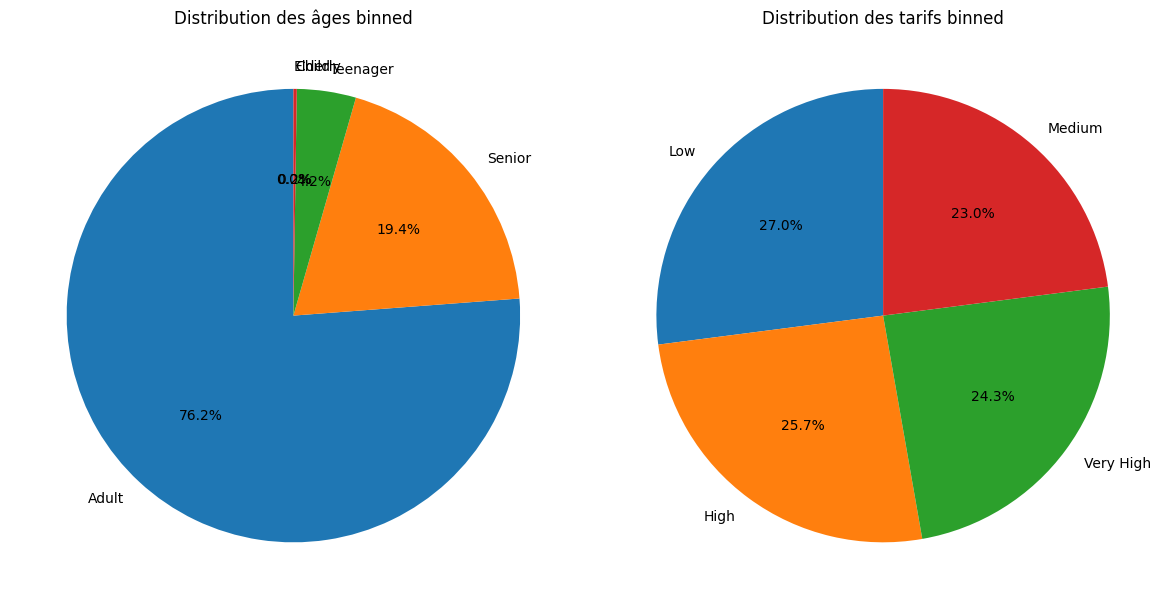

In [9]:
# Discrétisation de l'âge par binning
bins_age = [0, 12, 18, 35, 60, 120]  
labels_age = ['Child', 'Teenager', 'Adult', 'Senior', 'Elderly']
df['age_binned'] = pd.cut(df['age'], bins=bins_age, labels=labels_age, right=False)

# Discrétisation du tarif par quantiles
df['fare_binned'] = pd.qcut(df['fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Analyse des intervalles créés
age_counts = df['age_binned'].value_counts()
fare_counts = df['fare_binned'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart pour la distribution des âges
axs[0].pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Distribution des âges binned')

# Pie chart pour la distribution des tarifs
axs[1].pie(fare_counts, labels=fare_counts.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Distribution des tarifs binned')

plt.tight_layout()
plt.show()

### Analyse des Intervalles Créés
Âge : Les intervalles d'âge permettent de segmenter les passagers en groupes qui pourraient avoir des comportements de survie différents. Par exemple, les enfants peuvent être plus susceptibles d'être sauvés, tandis que les personnes âgées peuvent avoir moins de chances de survie en raison de leur vulnérabilité.

Tarif : En discrétisant le tarif en quantiles, on peut observer comment le prix du billet influence la survie. Les passagers ayant payé un tarif plus élevé pourraient avoir de meilleures chances de survie, ce qui pourrait indiquer un accès privilégié aux canots de sauvetage.

In [41]:
# Combinaison des variables discrétisées
df['age_fare_combined'] = df['age_binned'].astype(str) + "_" + df['fare_binned'].astype(str)

# Affichage de la nouvelle variable
combined_counts = df['age_fare_combined'].value_counts()
print("\nDistribution de la variable combinée (age_fare_combined) :\n", combined_counts)


Distribution de la variable combinée (age_fare_combined) :
 age_fare_combined
Adult_Low             187
Adult_Medium          165
Adult_High            156
Adult_Very High       126
Senior_Very High       70
Senior_High            42
Senior_Low             29
Senior_Medium          20
Teenager_High          15
Teenager_Low            9
Teenager_Medium         6
Teenager_Very High      5
Child_High              1
Child_Very High         1
Name: count, dtype: int64


## 3.3 Réduction de la cardinalité des variables catégorielles

Dans le dataset Titanic, les variables suivantes peuvent avoir une forte cardinalité :
    name : Contient probablement un grand nombre de noms uniques.
    ticket : Chaque numéro de ticket peut également être unique.
    cabin : Chaque cabine peut être unique.

In [30]:
df['name'].value_counts()

name
Kelly, Mr. James                               2
Connolly, Miss. Kate                           2
Allen, Miss. Elisabeth Walton                  1
Howard, Miss. May Elizabeth                    1
Ilmakangas, Miss. Pieta Sofia                  1
                                              ..
Hart, Mrs. Benjamin (Esther Ada Bloomfield)    1
Hart, Mr. Benjamin                             1
Hart, Miss. Eva Miriam                         1
Harris, Mr. Walter                             1
Zimmerman, Mr. Leo                             1
Name: count, Length: 1305, dtype: int64

In [31]:
df['ticket'].value_counts()

ticket
CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
373450           1
2223             1
350046           1
3101281          1
315082           1
Name: count, Length: 928, dtype: int64

In [32]:
df['cabin'].value_counts()

cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
B96 B98            4
C78                4
                  ..
E63                1
B102               1
B39                1
D40                1
F38                1
Name: count, Length: 185, dtype: int64

Pour cet exemple, concentrons-nous sur la variable name, qui contient une forte cardinalité à cause des nombreux noms différents.

In [33]:

import re
# Création d'une nouvelle variable qui extrait les titres des noms
df['title'] = df['name'].apply(lambda x: re.search(r'\b(Mrs|Mr|Miss|Ms|Master|Dr|Rev|Col|Major|Capt|Don|Mme|Mlle|Jonkheer|Sir|Dona|Lady)\b', x).group(0) if re.search(r'\b(Mrs|Mr|Miss|Ms|Master|Dr|Rev|Col|Major|Capt|Don|Mme|Mlle|Jonkheer|Sir|Dona|Lady)\b', x) else 'Other')

# Affichage des titres uniques et leur fréquence
title_counts = df['title'].value_counts()
print("\nTitres et leur fréquence :\n", title_counts)


Titres et leur fréquence :
 title
Mr          757
Miss        259
Mrs         196
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Ms            2
Major         2
Capt          1
Sir           1
Dona          1
Jonkheer      1
Other         1
Don           1
Mme           1
Lady          1
Name: count, dtype: int64


In [34]:
# Regroupement des titres
title_mapping = {
    'Mr': 'Mr',
    'Master': 'Mr',
    'Mrs': 'Mrs',
    'Miss': 'Miss',
    'Ms': 'Mrs',
    'Dr': 'Dr',
    'Rev': 'Other',
    'Col': 'Other',
    'Major': 'Other',
    'Capt': 'Other',
    'Don': 'Other',
    'Mme': 'Mrs',
    'Mlle': 'Miss',
    'Jonkheer': 'Other',
    'Sir': 'Other',
    'Dona': 'Other',
    'Lady': 'Other',
    'Other': 'Other'
}

df['title_reduced'] = df['title'].map(title_mapping)

# Affichage des nouveaux titres regroupés
reduced_title_counts = df['title_reduced'].value_counts()
print("\nTitres regroupés et leur fréquence :\n", reduced_title_counts)


Titres regroupés et leur fréquence :
 title_reduced
Mr       818
Miss     261
Mrs      199
Other     21
Dr         8
Name: count, dtype: int64


# 4.Smoothing

In [42]:
df2=pd.read_csv(r'C:\Users\Admin\Desktop\School\S5\Data Modeling\TP 1\DailyDelhiClimateTrain.csv')

In [37]:
df2.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [38]:
df2.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


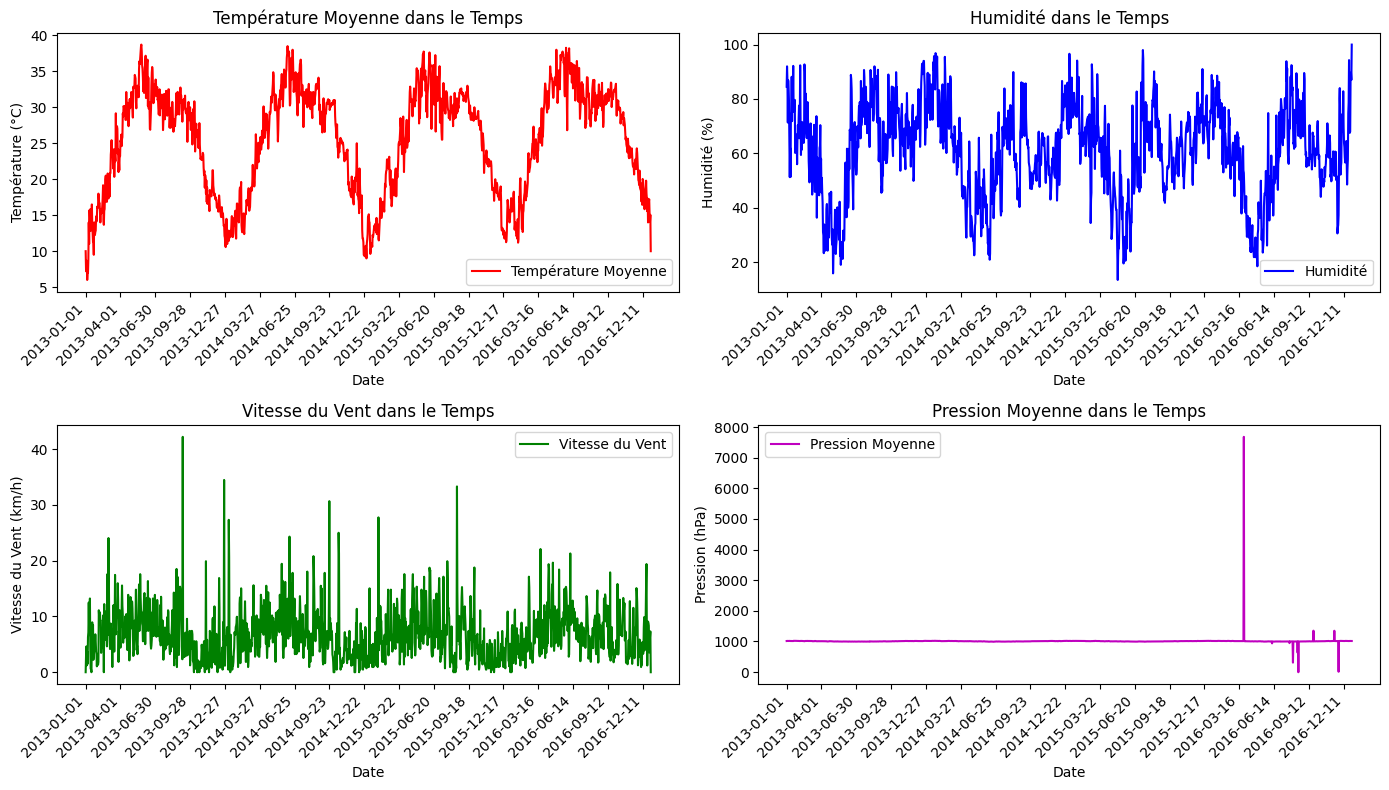

In [45]:
plt.figure(figsize=(14, 8))

xticks = df2['date'][::90]  # Prendre une étiquette tous les 30 jours
# Traçage de la température moyenne au fil du temps
plt.subplot(2, 2, 1)
plt.plot(df2['date'], df2['meantemp'], label='Température Moyenne', color='r')
plt.title('Température Moyenne dans le Temps')
plt.xlabel('Date')
plt.ylabel('Température (°C)')
plt.xticks(xticks,rotation=45,ha='right')
plt.legend()

# Traçage de l'humidité au fil du temps
plt.subplot(2, 2, 2)
plt.plot(df2['date'], df2['humidity'], label='Humidité', color='b')
plt.title('Humidité dans le Temps')
plt.xlabel('Date')
plt.ylabel('Humidité (%)')
plt.xticks(xticks,rotation=45,ha='right')
plt.legend()

# Traçage de la vitesse du vent au fil du temps
plt.subplot(2, 2, 3)
plt.plot(df2['date'], df2['wind_speed'], label='Vitesse du Vent', color='g')
plt.title('Vitesse du Vent dans le Temps')
plt.xlabel('Date')
plt.ylabel('Vitesse du Vent (km/h)')
plt.xticks(xticks,rotation=45,ha='right')
plt.legend()

# Traçage de la pression moyenne au fil du temps
plt.subplot(2, 2, 4)
plt.plot(df2['date'], df2['meanpressure'], label='Pression Moyenne', color='m')
plt.title('Pression Moyenne dans le Temps')
plt.xlabel('Date')
plt.ylabel('Pression (hPa)')
plt.xticks(xticks,rotation=45,ha='right')
plt.legend()

plt.tight_layout()
plt.show()

## 4.1.Moyenne Mobile

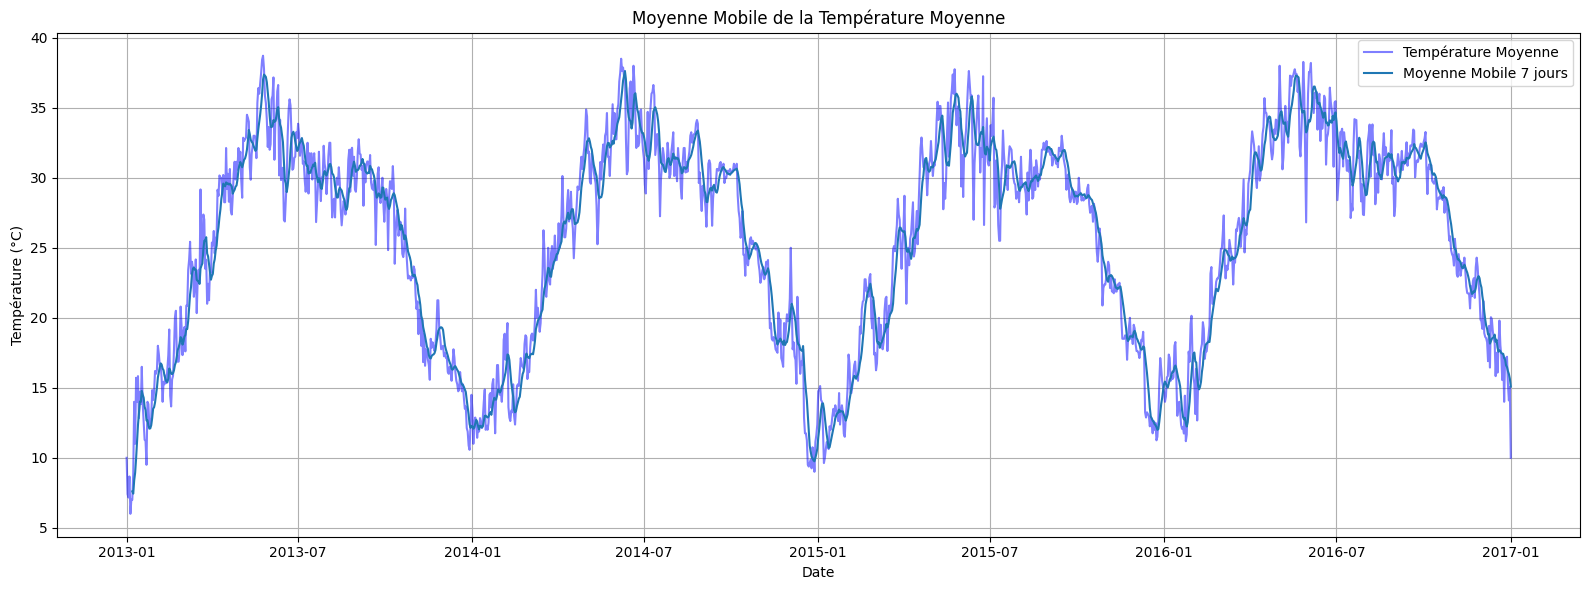

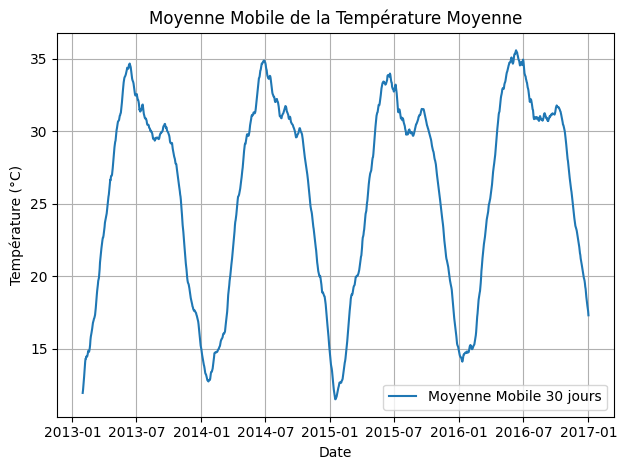

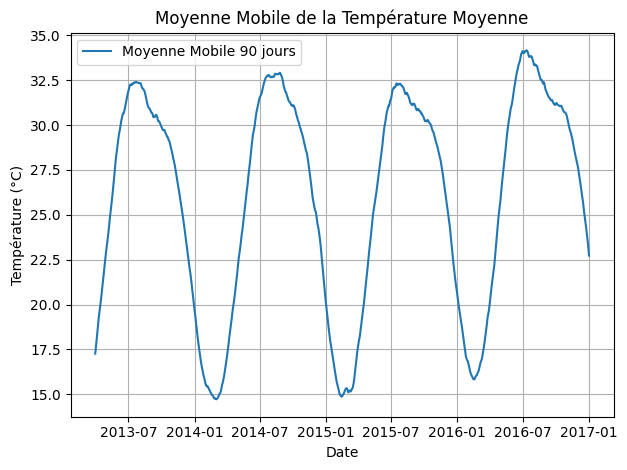

In [43]:
# Convertir la colonne 'date' en type datetime
df2['date'] = pd.to_datetime(df2['date'])

# Définir la colonne 'date' comme index
df2.set_index('date', inplace=True)

# Appliquer la moyenne mobile avec différentes fenêtres
window_sizes = [7, 30, 90]  
for window in window_sizes:
    df2[f'moving_avg_{window}'] = df2['meantemp'].rolling(window=window).mean()

plt.figure(figsize=(16, 6)) 
plt.plot(df2.index, df2['meantemp'], label='Température Moyenne', color='blue', alpha=0.5)
for window in window_sizes:
    plt.plot(df2.index, df2[f'moving_avg_{window}'], label=f'Moyenne Mobile {window} jours')
    plt.title('Moyenne Mobile de la Température Moyenne')
    plt.xlabel('Date')
    plt.ylabel('Température (°C)')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

## 4.2.Lissage exponentiel

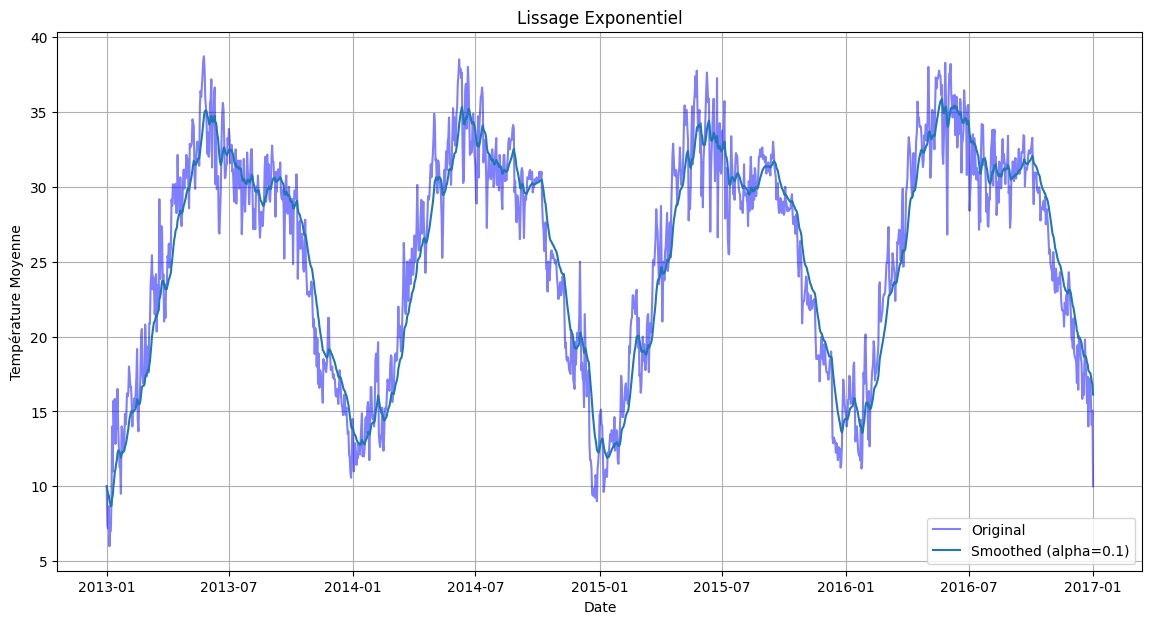

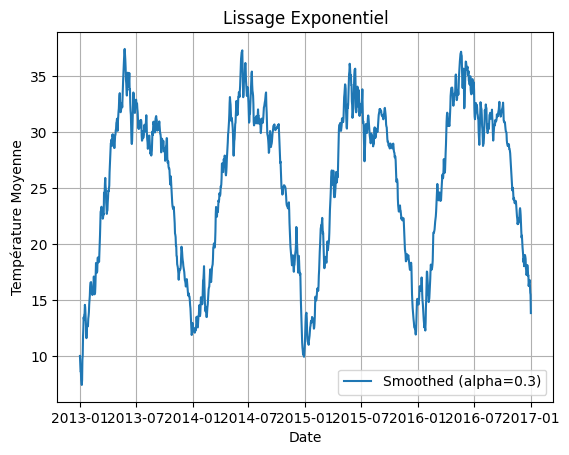

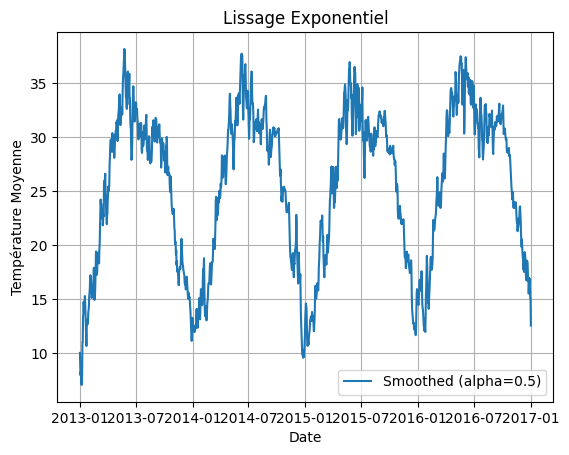

In [44]:
# Appliquer le lissage exponentiel avec différents paramètres alphas
alphas = [0.1, 0.3, 0.5]  
smoothed_series = {}

for alpha in alphas:
    smoothed_series[alpha] = df2['meantemp'].ewm(alpha=alpha, adjust=False).mean()

plt.figure(figsize=(14, 7))
plt.plot(df2['meantemp'], label='Original', color='blue', alpha=0.5)
for alpha, smoothed in smoothed_series.items():
    plt.plot(smoothed, label=f'Smoothed (alpha={alpha})')

    plt.title('Lissage Exponentiel')
    plt.xlabel('Date')
    plt.ylabel('Température Moyenne')
    plt.legend()
    plt.grid()
    plt.show()

## 4.3.Filtre Savitzky-Golay

In [46]:
from scipy.signal import savgol_filter

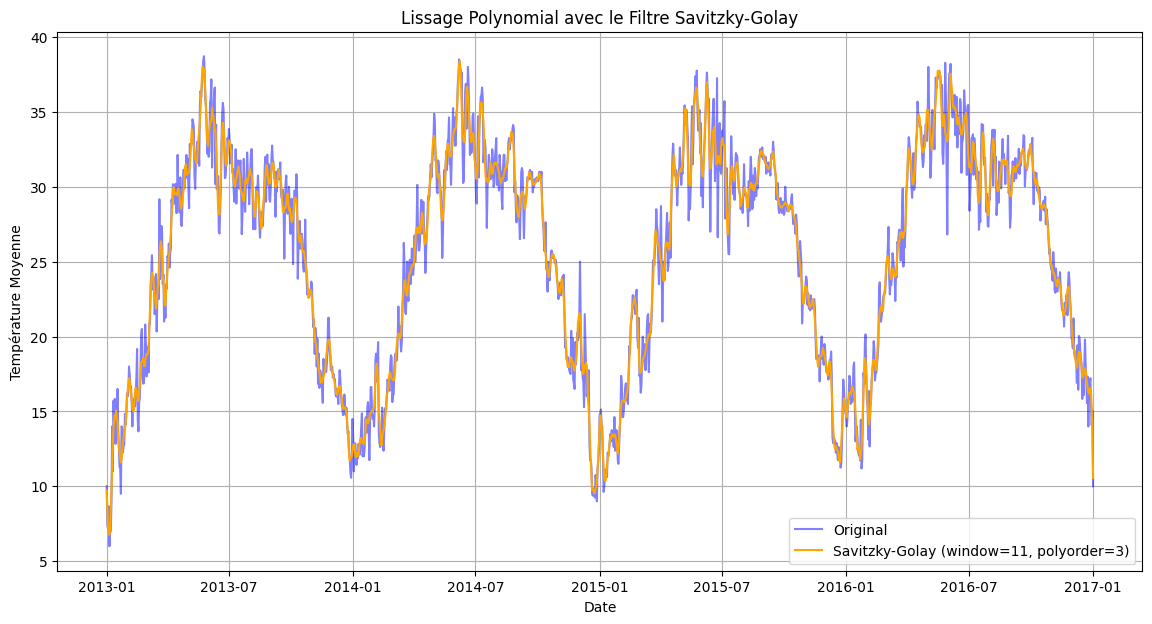

In [47]:
window_length = 11  # Taille de la fenêtre (doit être impair)
polyorder = 3       # Degré du polynôme

df2['savgol_smooth'] = savgol_filter(df2['meantemp'], window_length=window_length, polyorder=polyorder)

plt.figure(figsize=(14, 7))
plt.plot(df2['meantemp'], label='Original', color='blue', alpha=0.5)
plt.plot(df2['savgol_smooth'], label=f'Savitzky-Golay (window={window_length}, polyorder={polyorder})', color='orange')
plt.title('Lissage Polynomial avec le Filtre Savitzky-Golay')
plt.xlabel('Date')
plt.ylabel('Température Moyenne')
plt.legend()
plt.grid()
plt.show()

# 4.Comparaison des résultats

L'analyse des méthodes de lissage des données, telles que la moyenne mobile, le lissage exponentiel et le filtre Savitzky-Golay, révèle des avantages et des inconvénients distincts pour chaque approche. La moyenne mobile est appréciée pour sa simplicité et sa capacité à réduire le bruit, mais elle peut introduire un décalage dans les données et perdre des informations essentielles. Le lissage exponentiel, quant à lui, offre une réactivité rapide aux changements récents grâce à son paramètre de lissage (alpha), mais peut être sensible aux valeurs extrêmes et nécessite un choix judicieux de ce paramètre. En revanche, le filtre Savitzky-Golay préserve mieux les caractéristiques des données tout en permettant un ajustement flexible des paramètres, bien qu'il soit plus complexe à appliquer. La méthode la plus appropriée dépendra de la nature des données et des objectifs de l'analyse, nécessitant souvent des expérimentations et une validation croisée pour choisir la technique optimale.

# 5.Réduction de la dimensionnalité


--- PCA avec 2 Composantes ---
Variances expliquées (valeurs propres): [2.63368918 1.86769639]
Ratio de variance expliquée par composante: [0.26305237 0.18654516]


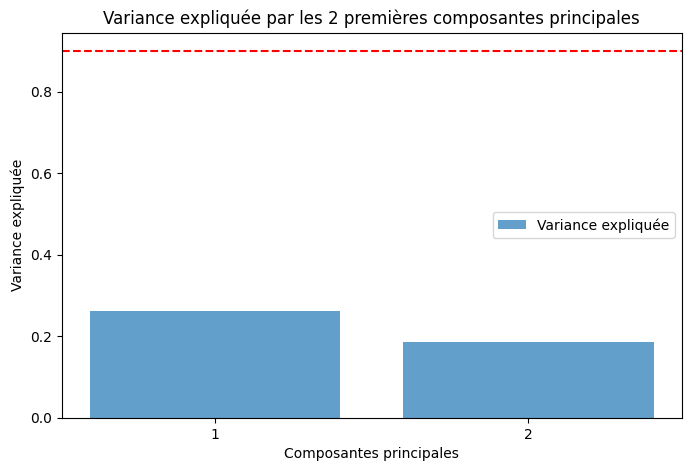


--- PCA avec 3 Composantes ---
Variances expliquées (valeurs propres): [2.63368918 1.86769639 1.47092139]
Ratio de variance expliquée par composante: [0.26305237 0.18654516 0.14691535]


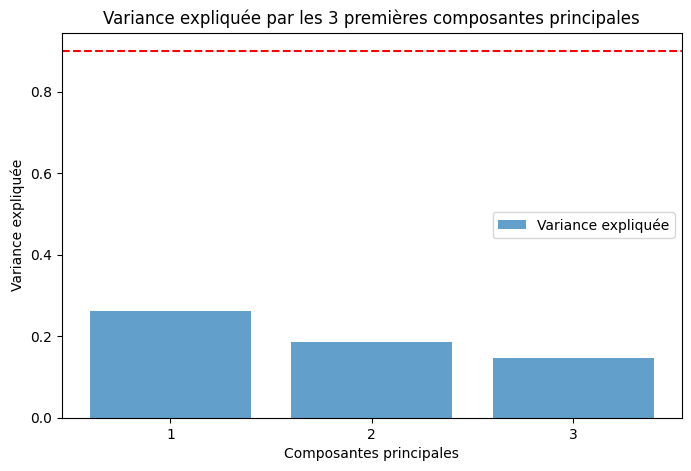


--- PCA avec 4 Composantes ---
Variances expliquées (valeurs propres): [2.63368918 1.86769639 1.47092139 1.11601941]
Ratio de variance expliquée par composante: [0.26305237 0.18654516 0.14691535 0.1114678 ]


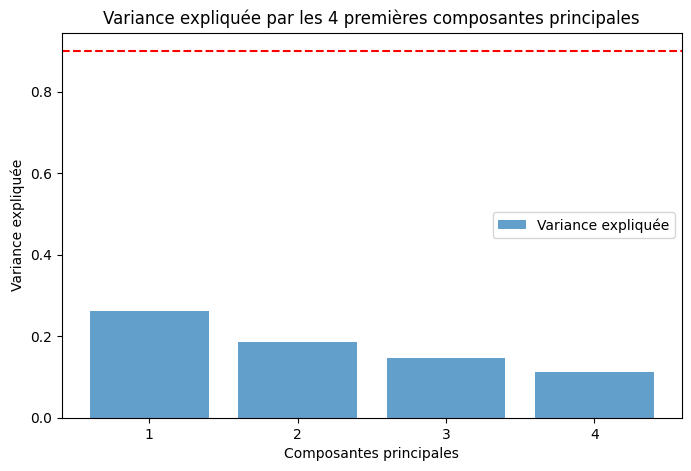

In [50]:
from sklearn.decomposition import PCA
numerical_cols = ['pclass', 'age', 'sibsp', 'parch', 'fare']  
df_numeric = df[numerical_cols].dropna()  

# Centrer et réduire les variables
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_cols])

# Fonction pour appliquer PCA et afficher les résultats
def apply_pca(n_components):
    pca = PCA(n_components=n_components)
    pca.fit(scaled_data)
    
    # Variances expliquées
    explained_variance = pca.explained_variance_
    explained_variance_ratio = pca.explained_variance_ratio_
    
    print(f"\n--- PCA avec {n_components} Composantes ---")
    print("Variances expliquées (valeurs propres):", explained_variance)
    print("Ratio de variance expliquée par composante:", explained_variance_ratio)

    plt.figure(figsize=(8, 5))
    plt.bar(range(1, n_components + 1), explained_variance_ratio, alpha=0.7, align='center', label='Variance expliquée')
    plt.ylabel('Variance expliquée')
    plt.xlabel('Composantes principales')
    plt.title(f'Variance expliquée par les {n_components} premières composantes principales')
    plt.xticks(range(1, n_components + 1))
    plt.axhline(y=0.9, color='r', linestyle='--')  # Ligne pour la variance cumulée
    plt.legend(loc='best')
    plt.show()

for n in [2, 3, 4]:
    apply_pca(n)

Variance expliquée par les deux premières composantes principales :
    Les deux premières composantes expliquent une part significative de la variance, avec une dominance marquée de la première composante. Cela indique que les deux dimensions capturent l'essentiel des informations dans le jeu de données, ce qui est essentiel pour l'analyse.

Variance expliquée par les trois premières composantes principales :
    L'ajout de la troisième composante montre une diminution de la variance expliquée. Cela souligne que, bien que la troisième composante apporte des informations, les deux premières suffisent largement à capturer les principales structures des données.

Variance expliquée par les quatre premières composantes principales :
    Pour quatre composantes, la tendance se maintient : la première composante reste la plus informative, tandis que la quatrième apporte peu d'informations supplémentaires. Cela valide l'efficacité de la réduction dimensionnelle, car les deux ou trois premières composantes suffisent pour la plupart des analyses sans perte significative d'information.